В задании нужно загрузить датасет с данными оттока и ответить на несколько вопросов (написать код). При этом сам датасет уже есть и его необязательно качать с репозитория

Цель задания: проверить базовые навыки работы студентов с Pandas, умение проводить такой же базовый EDA (exploratory data analysis), делать feature engineering и обучать и валидировать модель.

Список столбцов с типами данных в датасете:

customerID object
gender object
SeniorCitizen int64
Partner object
Dependents object
tenure int64
PhoneService object
MultipleLines object
InternetService object
OnlineSecurity object
OnlineBackup object
DeviceProtection object
TechSupport object
StreamingTV object
StreamingMovies object
Contract object
PaperlessBilling object
PaymentMethod object
MonthlyCharges float64
TotalCharges object
Churn object

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


1. Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

Количественно: 

Male      3555
Female    3488
Name: gender, dtype: int64




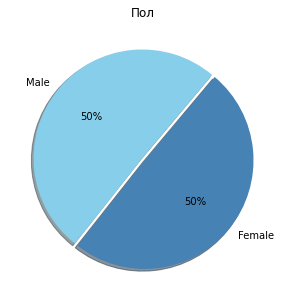

In [4]:
gender= df['gender'].value_counts()
print(f'Количественно: \n\n{gender}\n\n')

gender.plot(kind='pie',figsize=(5,5), autopct='%1.0f%%',  colors = ['skyblue', 'steelblue'], 
            explode = [0.01,0.02], startangle=50,shadow=True, title='Пол')
plt.ylabel('')

plt.show()

2. Какое количество уникальных значений у поля InternetService?

In [5]:
len(df['InternetService'].unique()) 

3

3. Выведите статистики по полю TotalCharges (median, mean, std).

In [6]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].describe()

count    7032.000000
mean     2283.300441
std      2266.771362
min        18.800000
25%       401.450000
50%      1397.475000
75%      3794.737500
max      8684.800000
Name: TotalCharges, dtype: float64

В чем странность того, что вы получили? (подсказка: смотреть нужно на тип данных)

4. Сделайте замену значений поля PhoneService на числовые (Yes->1, No->0)

In [7]:
df.replace({'PhoneService':{'Yes': 1, 'No': 0}}, inplace=True)
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

5. Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3

In [8]:
df['TotalCharges'].fillna(0, inplace=True)
df['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [10]:
df['TotalCharges'].isnull().sum() #для контроля

0

6. Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [11]:
df.replace({'Churn':{'Yes': 1, 'No': 0}}, inplace=True)
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

7. Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport на числовые (Yes -> 1, No -> 0, No internet service->0)

In [13]:
binary={'Yes': 1, 'No': 0, 'No internet service': 0}
df.replace({'StreamingMovies': binary,'StreamingTV': binary, 'TechSupport': binary},inplace=True)

In [14]:
df[['StreamingMovies', 'StreamingTV', 'TechSupport']].head(7)

,StreamingMovies,StreamingTV,TechSupport
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
5,1,1,0
6,0,1,0


8. Заполните пропуски в поле PhoneService значением 0

In [15]:
df['PhoneService'].fillna(0, inplace=True)
df['PhoneService'].isnull().sum()

0

In [16]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']

df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.85,0,0,0,0
1,Male,34,1,1889.50,0,0,0,0
2,Male,2,1,108.15,0,0,0,1


9. Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection. Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [17]:
from sklearn.model_selection import train_test_split

X = df[['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']]
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

10. соберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([
                ('selector', ColumnSelector(key='gender')),
                ('ohe', OHEEncoder(key='gender'))
            ])

11. Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [19]:
gender.fit_transform(X_train)

,gender_Female,gender_Male
6790,1,0
4156,0,1
710,0,1
1335,0,1
1661,1,0
...,...,...
6512,0,1
48,0,1
772,1,0
5944,0,1


12. Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
Вопрос - в каких случаях это может быть полезно?

In [22]:
from sklearn.preprocessing import StandardScaler

tenure =  Pipeline([
                ('selector', NumberSelector(key='tenure')),
                ('standard', StandardScaler())
            ])

13. Напишите аналогичный (как для tenure) преобразователь поля TotalCharges

In [23]:
total_charges =  Pipeline([
                ('selector', NumberSelector(key='TotalCharges')),
                ('standard', StandardScaler())
            ])

In [24]:
from sklearn.pipeline import FeatureUnion

number_features = Pipeline([
                ('selector', ColumnSelector(key=['PhoneService',
                                                 'StreamingMovies', 'StreamingTV', 
                                                 'TechSupport']))
            ])

In [25]:
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', total_charges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

In [26]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('features',feats),
    ('classifier', RandomForestClassifier(random_state = 42)),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

14. Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [27]:
pipeline.predict_proba(X_test)

array([[0.08, 0.92],
       [1.  , 0.  ],
       [0.88, 0.12],
       ...,
       [0.92, 0.08],
       [0.98, 0.02],
       [0.85, 0.15]])

15. Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [28]:
from sklearn.metrics import roc_auc_score, log_loss

print("roc auc score: {}".format(roc_auc_score(y_true=y_test, y_score=pipeline.predict_proba(X_test)[:,1])))
print("log loss score: {}".format(log_loss(y_true=y_test, y_pred=pipeline.predict_proba(X_test)[:,1])))

roc auc score: 0.7641615393069725
log loss score: 0.9255737270205829


In [29]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)

ModuleNotFoundError: No module named 'dill'